---------------------------------------------------------------------------
Nama          : Muhammad Jilham

Email         : muhammadjilham@gmail.com

Program       : DBS Foundation Coding Camp

Learning Path : Machine Learning

Topic         : Belajar Machine Learning untuk Pemula - Klasifikasi Gambar

---------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Conv2D, Dense, MaxPooling2D
from keras.optimizers.legacy import Adam
from keras.preprocessing.image import ImageDataGenerator

#Import & unzip data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Dicoding/rockpaperscissors.zip'

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [ ]:
data_set = '/content/rockpaperscissors'

# Parameter

In [ ]:
img_width = 150
img_height = 150
channels = 3
img_shape = (img_width, img_height, channels)
latent_dim = 100
adam = Adam()

# Membuat Generator





In [ ]:
# Augmentasi Gambar
data_gen = ImageDataGenerator (
    rescale = 1./255,
    validation_split = 0.40
)

In [ ]:
# Training Generator
training_gen = data_gen.flow_from_directory(
    data_set,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training',
    classes = ['rock', 'paper', 'scissors']
)

# Validation Generator
validation_gen = data_gen.flow_from_directory(
    data_set,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation',
    classes = ['rock', 'paper', 'scissors']
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
def build_generator():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape = img_shape))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    model.summary()

    return model

generator = build_generator()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
generator.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

# Train Generator

In [ ]:
Training = generator.fit(
    training_gen,
    steps_per_epoch = training_gen.samples // training_gen.batch_size,
    epochs=25,
    validation_data = validation_gen,
    validation_steps = validation_gen.samples // validation_gen.batch_size,
    verbose=2
)

Epoch 1/25
41/41 - 10s - loss: 0.7105 - accuracy: 0.6708 - val_loss: 0.2652 - val_accuracy: 0.9109 - 10s/epoch - 239ms/step
Epoch 2/25
41/41 - 6s - loss: 0.1946 - accuracy: 0.9337 - val_loss: 0.1051 - val_accuracy: 0.9630 - 6s/epoch - 134ms/step
Epoch 3/25
41/41 - 7s - loss: 0.0803 - accuracy: 0.9696 - val_loss: 0.1417 - val_accuracy: 0.9549 - 7s/epoch - 166ms/step
Epoch 4/25
41/41 - 6s - loss: 0.0691 - accuracy: 0.9758 - val_loss: 0.0883 - val_accuracy: 0.9734 - 6s/epoch - 144ms/step
Epoch 5/25
41/41 - 5s - loss: 0.0380 - accuracy: 0.9844 - val_loss: 0.0793 - val_accuracy: 0.9826 - 5s/epoch - 134ms/step
Epoch 6/25
41/41 - 9s - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.1072 - val_accuracy: 0.9792 - 9s/epoch - 209ms/step
Epoch 7/25
41/41 - 6s - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.2299 - val_accuracy: 0.9549 - 6s/epoch - 145ms/step
Epoch 8/25
41/41 - 9s - loss: 0.0402 - accuracy: 0.9836 - val_loss: 0.1233 - val_accuracy: 0.9699 - 9s/epoch - 217ms/step
Epoch 9/25
41/41 - 6s 

In [ ]:
# Akurasi Train dan Validation
train_loss, train_accuracy = generator.evaluate(training_gen)
val_loss, val_accuracy = generator.evaluate(validation_gen)
print(f'Akurasi Train: {train_accuracy * 100:.2f}%')
print(f'Akurasi Validation: {val_accuracy * 100:.2f}%')

28/28 [==============================] - 3s 102ms/step - loss: 0.1139 - accuracy: 0.9874
Akurasi Train: 100.00%
Akurasi Validation: 98.74%


In [ ]:
# Save Hasil Training
generator.save('rockpaperscissors_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Memprediksi Model

Saving cfFHU3Y39yeofrTg.png to cfFHU3Y39yeofrTg.png
1/1 [==============================] - 0s 81ms/step


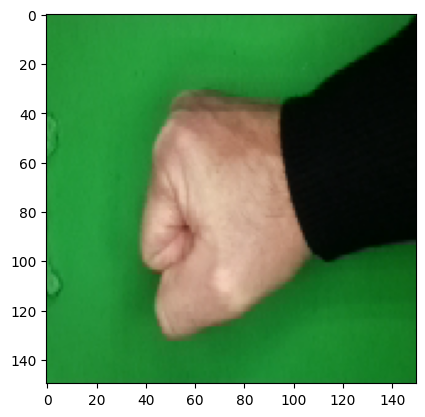

rock: 1
paper: 0
scissors: 0


In [26]:
from google.colab import files
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('rockpaperscissors_model.h5')
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = '/content/' + filename

    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)

    plt.imshow(img)
    plt.show()

classes = training_gen.class_indices
for class_name, index in classes.items():
    print(f"{class_name}: {predictions[0][index].astype(int)}")
